In [1]:
import pandas as pd
import datetime as dt
import numpy as np

from matplotlib import pyplot as plt

In [3]:
!ls -la
!ls -la datasets

итого 256
drwxrwxr-x 4 alex alex   4096 сен 24 11:39  .
drwxrwxr-x 4 alex alex   4096 сен 16 21:28  ..
drwxrwxr-x 2 alex alex   4096 сен 24 00:22  datasets
-rw-rw-r-- 1 alex alex     72 сен 24 11:39  DownloadedData.ipynb
drwxrwxr-x 2 alex alex   4096 сен 24 11:39  .ipynb_checkpoints
-rw-rw-r-- 1 alex alex 241068 сен 24 11:39 'Без названия.ipynb'
итого 3320060
drwxrwxr-x 2 alex alex       4096 сен 24 00:22 .
drwxrwxr-x 4 alex alex       4096 сен 24 11:39 ..
-rw-rw-r-- 1 alex alex    2073002 сен 24 00:22 BTC-28OCT22-C.csv
-rw-rw-r-- 1 alex alex    1953675 сен 24 00:22 BTC-28OCT22-P.csv
-rw-rw-r-- 1 alex alex    2393243 сен 24 00:22 BTC-30DEC22-C.csv
-rw-rw-r-- 1 alex alex    2266538 сен 24 00:22 BTC-30DEC22-P.csv
-rw-rw-r-- 1 alex alex    1823975 сен 24 00:22 BTC-30JUN23-C.csv
-rw-rw-r-- 1 alex alex    1827753 сен 24 00:22 BTC-30JUN23-P.csv
-rw-rw-r-- 1 alex alex    2732033 сен 24 00:22 BTC-30SEP22-C.csv
-rw-rw-r-- 1 alex alex    2506136 сен 24 00:22 BTC-30SEP22-P.csv
-rw-rw-r-- 1 alex a

In [14]:
from os import listdir
from os.path import isfile, join

mypath = "datasets/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.startswith("BTC")]

In [15]:
onlyfiles

['BTC-28OCT22-C.csv',
 'BTC-28OCT22-P.csv',
 'BTC-30DEC22-C.csv',
 'BTC-30JUN23-C.csv',
 'BTC-7OCT22-C.csv',
 'BTC-7OCT22-P.csv',
 'BTC-30SEP22-C.csv',
 'BTC-31MAR23-C.csv',
 'BTC-31MAR23-P.csv',
 'BTC-30JUN23-P.csv',
 'BTC-30SEP22-P.csv',
 'BTC-30DEC22-P.csv']

In [23]:
files = {}

for file in onlyfiles:
    files[file[:-4]] = pd.read_csv(mypath + file, index_col=0)

In [46]:
ts = pd.to_datetime(["2022-09-30", "2022-10-7", "2022-10-28", "2022-12-30", "2023-03-31", "2023-06-30"])

In [49]:
name_to_time = dict( zip(
('BTC-30SEP22', 
'BTC-7OCT22',
'BTC-28OCT22',
'BTC-30DEC22',
'BTC-31MAR23',
'BTC-30JUN23'), 
    ts ) )

In [50]:
name_to_time

{'BTC-30SEP22': Timestamp('2022-09-30 00:00:00'),
 'BTC-7OCT22': Timestamp('2022-10-07 00:00:00'),
 'BTC-28OCT22': Timestamp('2022-10-28 00:00:00'),
 'BTC-30DEC22': Timestamp('2022-12-30 00:00:00'),
 'BTC-31MAR23': Timestamp('2023-03-31 00:00:00'),
 'BTC-30JUN23': Timestamp('2023-06-30 00:00:00')}

In [67]:
for key, _ in files.items():
    files[key]['expiration'] = name_to_time[key[:-2]]
    files[key]['timestamp'] = pd.to_datetime(files[key]['timestamp'])
    files[key]['time_to_exp'] = (files[key]['expiration'] - files[key]['timestamp']).dt.days / 365 

In [75]:
files[key][files[key]['timestamp'] == '2022-09-20 02:00:00']

,volume_option,ticks_option,status_option,open_option,low_option,high_option,cost_option,close_option,timestamp,strike,volume_underlying,ticks_underlying,status_underlying,open_underlying,low_underlying,high_underlying,cost_underlying,close_underlying,expiration,time_to_exp
719,0.0,1.663628e+09,ok,0.0130,0.0130,0.0130,0.0,0.0130,2022-09-20 02:00:00,10000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973
1440,0.0,1.663628e+09,ok,0.0550,0.0550,0.0550,0.0,0.0550,2022-09-20 02:00:00,15000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973
2161,0.0,1.663628e+09,ok,0.0615,0.0615,0.0615,0.0,0.0615,2022-09-20 02:00:00,16000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973
2882,0.0,1.663628e+09,ok,0.1145,0.1145,0.1145,0.0,0.1145,2022-09-20 02:00:00,18000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973
3603,0.0,1.663628e+09,ok,0.1810,0.1810,0.1810,0.0,0.1810,2022-09-20 02:00:00,20000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973
4324,0.0,1.663628e+09,ok,0.1970,0.1970,0.1970,0.0,0.1970,2022-09-20 02:00:00,22000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973
5045,0.0,1.663628e+09,ok,0.3455,0.3455,0.3455,0.0,0.3455,2022-09-20 02:00:00,24000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973
5766,0.0,1.663628e+09,ok,0.2060,0.2060,0.2060,0.0,0.2060,2022-09-20 02:00:00,25000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973
6487,0.0,1.663628e+09,ok,0.4310,0.4310,0.4310,0.0,0.4310,2022-09-20 02:00:00,26000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973
7208,0.0,1.663628e+09,ok,0.3365,0.3365,0.3365,0.0,0.3365,2022-09-20 02:00:00,28000.0,89.256428,1.663628e+09,ok,19606.0,19531.5,19637.5,1746950.0,19537.5,2022-12-30,0.273973


In [74]:
set(files[key]['timestamp'])

{Timestamp('2022-08-21 03:00:00'),
 Timestamp('2022-08-21 04:00:00'),
 Timestamp('2022-08-21 05:00:00'),
 Timestamp('2022-08-21 06:00:00'),
 Timestamp('2022-08-21 07:00:00'),
 Timestamp('2022-08-21 08:00:00'),
 Timestamp('2022-08-21 09:00:00'),
 Timestamp('2022-08-21 10:00:00'),
 Timestamp('2022-08-21 11:00:00'),
 Timestamp('2022-08-21 12:00:00'),
 Timestamp('2022-08-21 13:00:00'),
 Timestamp('2022-08-21 14:00:00'),
 Timestamp('2022-08-21 15:00:00'),
 Timestamp('2022-08-21 16:00:00'),
 Timestamp('2022-08-21 17:00:00'),
 Timestamp('2022-08-21 18:00:00'),
 Timestamp('2022-08-21 19:00:00'),
 Timestamp('2022-08-21 20:00:00'),
 Timestamp('2022-08-21 21:00:00'),
 Timestamp('2022-08-21 22:00:00'),
 Timestamp('2022-08-21 23:00:00'),
 Timestamp('2022-08-22 00:00:00'),
 Timestamp('2022-08-22 01:00:00'),
 Timestamp('2022-08-22 02:00:00'),
 Timestamp('2022-08-22 03:00:00'),
 Timestamp('2022-08-22 04:00:00'),
 Timestamp('2022-08-22 05:00:00'),
 Timestamp('2022-08-22 06:00:00'),
 Timestamp('2022-08-

In [92]:
from scipy.optimize import root_scalar

from scipy import stats as sps

In [174]:
def get_iv(call_price, strike, price, interest_rate, expiration_time):
    
    def foo(vol):
        d1 = (np.log(price / strike) + 0.5 * vol ** 2 * expiration_time) \
            / (vol * np.sqrt(expiration_time))
        d2 = d1 - vol * np.sqrt(expiration_time)
        
        D = np.exp(-interest_rate * expiration_time)
        call_price_ =  D *  ( price * sps.norm.cdf(d1) - strike * sps.norm.cdf(d2) )
        return call_price_ - call_price
    x = np.nan
    try:
        x = root_scalar(foo, method='bisect', bracket=[1e-10, 10]).root
    except:
        pass
    return x

In [208]:
times = None
for key in name_to_time.keys():
    if key == 'BTC-7OCT22':
        continue
    df = files[key + '-C']
    print(key, len(df.dropna().timestamp))
    if times is None:
        times = set(df.dropna().timestamp)
    times = times & set(df.dropna().timestamp)

BTC-30SEP22 18011
BTC-28OCT22 12432
BTC-30DEC22 15862
BTC-31MAR23 14420
BTC-30JUN23 12257


In [209]:
times

{Timestamp('2022-08-26 13:00:00'),
 Timestamp('2022-08-26 14:00:00'),
 Timestamp('2022-08-26 15:00:00'),
 Timestamp('2022-08-26 16:00:00'),
 Timestamp('2022-08-26 17:00:00'),
 Timestamp('2022-08-26 18:00:00'),
 Timestamp('2022-08-26 19:00:00'),
 Timestamp('2022-08-26 20:00:00'),
 Timestamp('2022-08-26 21:00:00'),
 Timestamp('2022-08-26 22:00:00'),
 Timestamp('2022-08-26 23:00:00'),
 Timestamp('2022-08-27 00:00:00'),
 Timestamp('2022-08-27 01:00:00'),
 Timestamp('2022-08-27 02:00:00'),
 Timestamp('2022-08-27 03:00:00'),
 Timestamp('2022-08-27 04:00:00'),
 Timestamp('2022-08-27 05:00:00'),
 Timestamp('2022-08-27 06:00:00'),
 Timestamp('2022-08-27 07:00:00'),
 Timestamp('2022-08-27 08:00:00'),
 Timestamp('2022-08-27 09:00:00'),
 Timestamp('2022-08-27 10:00:00'),
 Timestamp('2022-08-27 11:00:00'),
 Timestamp('2022-08-27 12:00:00'),
 Timestamp('2022-08-27 13:00:00'),
 Timestamp('2022-08-27 14:00:00'),
 Timestamp('2022-08-27 15:00:00'),
 Timestamp('2022-08-27 16:00:00'),
 Timestamp('2022-08-

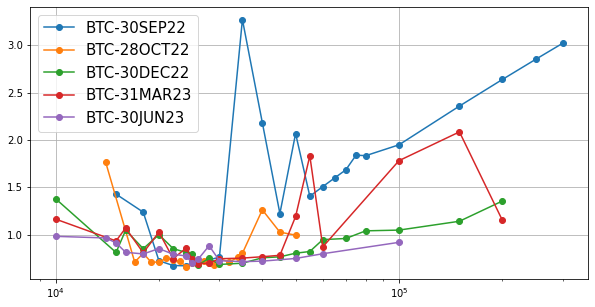

In [230]:
times = None
plt.figure(figsize=(10, 5))
for key in name_to_time.keys():
    if key == 'BTC-7OCT22':
        continue
    df = files[key + '-C']
    df = df[df.timestamp == '2022-09-01 01:00:00']
    
    F = df.close_underlying.values
    C = df.close_option.values * F
    K = df.strike.values
    tau = df.time_to_exp.values
    
    iv = []
    for c, f, k, ta in zip(C, F, K, tau):
        iv.append(get_iv(c, k, f, r, ta))
    plt.semilogx(K, iv, '-o', label=key)
plt.legend(fontsize=15)
plt.grid()

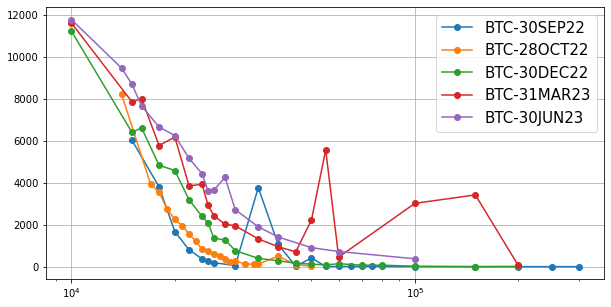

In [231]:
times = None
plt.figure(figsize=(10, 5))
for key in name_to_time.keys():
    if key == 'BTC-7OCT22':
        continue
    df = files[key + '-C']
    df = df[df.timestamp == '2022-09-01 01:00:00']
    
    F = df.close_underlying.values
    C = df.close_option.values * F
    K = df.strike.values
    plt.semilogx(K, C, '-o',label=key)
plt.legend(fontsize=15)
plt.grid()

In [194]:
key = 'BTC-28OCT22-C'

In [195]:
tmp = files[key][files[key]['timestamp'] == '2022-09-20 01:00:00']

In [197]:
F = tmp.close_underlying.values
C = tmp.close_option.values * F
K = tmp.strike.values

tau = tmp.time_to_exp.values

r = 0.0

In [198]:
iv = []
for c, f, k, ta in zip(C, F, K, tau):
    iv.append(get_iv(c, k, f, r, ta))

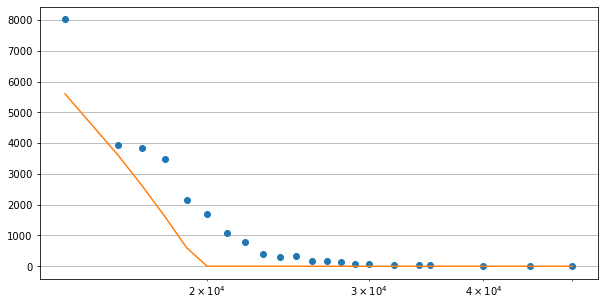

In [199]:
plt.figure(figsize=(10, 5))
plt.semilogx(K, C, 'o')
plt.semilogx(K, np.maximum(F - K, 0.0))
plt.grid()

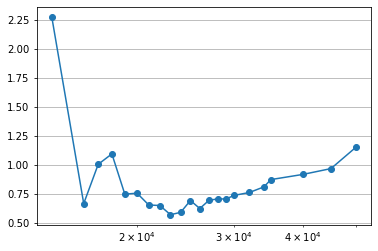

In [200]:
plt.semilogx(K, iv, '-o')
plt.grid()